<a href="https://colab.research.google.com/github/jarodchristiansen/PythonProjects/blob/master/Chest_Xrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip test.zip

Archive:  test.zip
replace test/IM-0001-0001.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!unzip train.zip

Archive:  train.zip
replace train/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!pip install keras

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('Chest_xray_Corona_Metadata.csv')

In [ ]:
data.drop('Unnamed: 0', axis=1)

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...
5905,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [ ]:
#train = data.loc[data['Dataset_type'] == 'TRAIN']
#test = data.loc[data['Dataset_type'] == 'TEST']

In [ ]:
virus_train = data.loc[data['Label_1_Virus_category'] == 'Virus'].drop('Unnamed: 0', axis=1)
bacteria_train = data.loc[data['Label_1_Virus_category'] == 'bacteria'].drop('Unnamed: 0', axis=1)
normal_train = data.loc[data['Label'] == 'Normal'].drop('Unnamed: 0', axis=1)

In [ ]:
from PIL import Image
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os
import cv2

In [ ]:
#image data shape(n, width, height, rgb)


x = []#images
y = []#categories

folder_train = 'train'
folder_test = 'test'
virus_test_imgs = []
bacteria_test_imgs = []
normal_test_imgs = []


name_encode = {'train':0, 'test':1}, 

def images_to_array(folder,name):
  for image in os.listdir(folder):
    loaded_image = Image.open(os.path.join(folder,image))
    resized_image = Image.Image.resize(loaded_image, [150,150])
    image_array = np.array(resized_image)
    x.concatanate(image_array)
    y.concatanate(name)
    

def show_image(x,y,index):
   plt.imshow(x[index])
   plt.show()
   print(y[index])

#y = to_categorical(y, num_classes=2)
x = (np.array(x) -127.5)

images_to_array(folder_train, 'train')
images_to_array(folder_test, 'test')
#images_to_array('Normal', folder_train,normal,normal_train_imgs,X0,y0)
#images_to_array('Virus',folder_test,virus_test,virus_test_imgs,X0,y0)
#images_to_array('Bacteria',folder_test,bacteria_test,bacteria_test_imgs,X0,y0)
#images_to_array('Normal',folder_test,normal_test,normal_test_imgs,X0,y0)

AttributeError: ignored

In [ ]:
X0

In [ ]:
type(X0)

In [ ]:
y0[12]

In [ ]:
show_image(X0,y0,5000)

In [ ]:
from keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(32, (5,5), padding='same', activation='relu', input_shape=(100,100,2)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same', activation='relu', input_shape=(100,100,2)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(100, (5,5), padding='same', activation='relu', input_shape=(100,100,2)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(124))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

In [ ]:
X0 = X0[0:1555]
y0 = y0[0:1555]
X1 = X1[0:1555]
y1 = y1[0:1555]
X2 = X2[0:1555]
y2 = y2[0:1555]

In [ ]:
from sklearn.model_selection import train_test_split 

x0_train, x0_test, y0_train,y0_test, = train_test_split(X0,y0)

In [ ]:
from keras.optimizers import Adam

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x0_train,y0_train, batch_size=10, epochs=10, validation_data=(x0_test, y0_test))
model.save('Covid_X-Ray_CNN.h5')


plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('CNN Accuracy: Train and test')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
from keras.models import load_model
model = load_model('road_pedestrain_CNN.h5')

def prediction(index_number):
  img = (np.array(x[index_number]) - 127.5)/127.5
  img = img.reshape(1,100,100,3)
  prediction = model.predict_classes(img)
  if prediction == 1:
    print('Prediction: pedestrian')
  elif prediction == 0:
    print('Prediction: road')
  else:
    print('Not 1 or 0, Take a look')
  plt.imshow(x[index_number])
  plt.show
prediction(137)

In [ ]:
model = load_model('road_pedestrain_CNN.h5')

def prediction(index_number):
  img_loaded = Image.open(image_path)
  img_resized = Image.Image.resize(img_loaded, (100,100))
  img = (np.array(img_resized) - 127.5)/127.5
  img = img.reshape(1,100,100,3)
  prediction = model.predict_classes(img)
  if prediction == 0:
    print('Prediction: pedestrian')
  elif predictino == 1:
    print('Prediction: road')
  else:
    print('Not 1 or 0, Take a look')
  plt.imshow(img_resized)
  plt.show
prediction()

The second attempt will follow these blank cells

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, InputLayer, Activation
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, Accuracy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
metadata = pd.read_csv("Chest_xray_Corona_Metadata.csv")
metadata = metadata.drop("Unnamed: 0", axis=1)
metadata.describe(include="all")

,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
count,5910,5910,5910,69,4334
unique,5910,2,2,4,3
top,person13_bacteria_49.jpeg,Pnemonia,TRAIN,COVID-19,bacteria
freq,1,4334,5286,58,2777


In [ ]:
# Drop all information but "Label_1_Virus_category" and "Dataset_type"
metadata.drop(["Label_1_Virus_category", "Label_2_Virus_category"], axis=1, inplace=True)

In [ ]:
# Check Dataset_type
print(metadata["Dataset_type"].unique())
# Check Label_1_Virus_category
print(metadata["Label"].unique())

['TRAIN' 'TEST']
['Normal' 'Pnemonia']


In [ ]:
# Replace name of "Label_2_Virus_category" to "Label"
if("Label_1_Virus_category" in metadata.columns):
    metadata["Label"] = metadata["Label_1_Virus_category"]
    metadata.drop("Label_1_Virus_category", axis=1, inplace=True)
metadata["image"] = np.asarray(np.nan, dtype=object)  # To make sure I can assign an array to the column, otherwise dtypes won't match
print(metadata.head())
print(f"\nDifferent values of labels distribution:\n{metadata['Label'].value_counts()}")

    X_ray_image_name   Label Dataset_type image
0  IM-0128-0001.jpeg  Normal        TRAIN   NaN
1  IM-0127-0001.jpeg  Normal        TRAIN   NaN
2  IM-0125-0001.jpeg  Normal        TRAIN   NaN
3  IM-0122-0001.jpeg  Normal        TRAIN   NaN
4  IM-0119-0001.jpeg  Normal        TRAIN   NaN

Different values of labels distribution:
Pnemonia    4334
Normal      1576
Name: Label, dtype: int64


In [ ]:
imgs_dir = "/content/test"
imgs_dir2 = "/content/train" 

IMG_SZ = 127
for name in glob(imgs_dir, recursive=True):
    image_name = name.split("/")[-1]
    # Open image
    img = Image.open(name).convert("L")  # Some images have RGB components, not grayscaled
    # Resize all images to 127x127
    maxsize = (127, 127)
    img = ImageOps.fit(img,
                       maxsize,
                       Image.ANTIALIAS)
    # Add to DataFrame
    if(image_name.lower() in metadata["X_ray_image_name"].str.lower().values):
        index_df = metadata[(metadata["X_ray_image_name"] == image_name)].index[0]
        metadata.at[index_df, "image"] = np.asarray(img)

TypeError: ignored

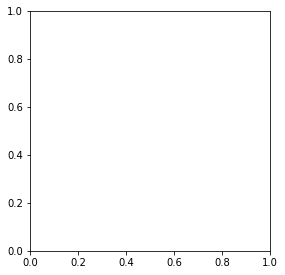

In [ ]:
pneumonia = metadata.loc[metadata["Label"] == "Pnemonia", "image"]
plt.figure(figsize=(15,15))
ax = plt.subplot(3,2, 1)
plt.imshow(pneumonia[pneumonia.index[10]], cmap="gist_gray")
ax.add_patch(patches.Circle((110, 100), radius=15, linewidth=2, fill=False, color="r"))
ax.add_patch(patches.Circle((60, 40), radius=20, linewidth=2, fill=False, color="orange"))
ax.add_patch(patches.Circle((20, 100), radius=10, linewidth=2, fill=False, color="blue"))
plt.title("Pneumonia")
ax = plt.subplot(3,2, 3)
plt.imshow(pneumonia[pneumonia.index[20]], cmap="gist_gray")
ax.add_patch(patches.Circle((80, 70), radius=20, linewidth=2, fill=False, color="orange"))
ax.add_patch(patches.Circle((20, 100), radius=10, linewidth=2, fill=False, color="blue"))
plt.title("Pneumonia")
ax = plt.subplot(3,2, 5)
plt.imshow(pneumonia[pneumonia.index[35]], cmap="gist_gray")
ax.add_patch(patches.Circle((80, 60), radius=20, linewidth=2, fill=False, color="orange"))
plt.title("Pneumonia")
normal = metadata.loc[metadata["Label"] == "Normal", "image"]
ax = plt.subplot(3,2, 2)
plt.imshow(normal[normal.index[10]], cmap="gist_gray")
plt.title("Normal")
ax = plt.subplot(3,2, 4)
plt.imshow(normal[normal.index[20]], cmap="gist_gray")
plt.title("Normal")
ax = plt.subplot(3,2, 6)
plt.imshow(normal[normal.index[40]], cmap="gist_gray")
plt.title("Normal")
plt.show()